In [2]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# The starter code is short and simple, take a look!
from starter import *

# Phase 1 - Create Inputs

In [ ]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    pass
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    pass
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    pass

In [ ]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')

# Phase 2 - Implement your Solver

In [195]:
import random
G = read_input('/Users/bryceharrell/Desktop/170/170-proj/inputs/small1.in')
print(random.sample(G.nodes, 10))
teamCount = random.randint(1, len(G.nodes) // 5)
print(teamCount)
teamSize = len(G.nodes) // teamCount
print(teamSize)




[52, 87, 82, 83, 37, 69, 8, 91, 36, 7]
12
8


/var/folders/1w/5qzs1vk96mz0h0ft90ykxwph0000gn/T/ipykernel_87248/2139184680.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  print(random.sample(G.nodes, 10))


In [280]:
import copy
def removeNodes(List, toRemove):
    for node in toRemove:
        List.remove(node)
    return List
        

def randomTeamSample(G, teamCount):
    nodes = copy.deepcopy(list(G))
    #teamCount = random.randint(1, len(nodes) // 6)
    #print("Team Count: " + str(teamCount))
    teamSize = len(nodes) // teamCount
    #print("Team Size: " + str(teamSize))
    for teamNum in range(1, teamCount + 1):
        verts = random.sample(nodes, teamSize)
        nodes = removeNodes(nodes, verts)
        for v in verts:
            G.nodes[v]['team'] = teamNum
    
    for remainingNode in nodes:
        G.nodes[remainingNode]['team'] = random.randint(1, teamCount)
    
    return G

def getNeighbors(G, currentTeamCount):
    neighbors = []
    

    for v in G.nodes():
        otherVert = random.sample(G.nodes(), 1)
        if (v != otherVert):
            copyG = copy.deepcopy(G)
            team1 = copyG.nodes[v]['team']
            team2 = copyG.nodes[otherVert[0]]['team']
            copyG.nodes[v]['team'] = team2
            copyG.nodes[otherVert[0]]['team'] = team1
            #print("Swapping " + str(v) + "from team " + str(team1) + " with " + str(otherVert) + " from team " + str(team2))
        neighbors.append(copyG)

    if (currentTeamCount > 1):
        oneLess = randomTeamSample(G, currentTeamCount - 1)
        for v in oneLess.nodes():
            otherVert = random.sample(oneLess.nodes(), 1)
            if (v != otherVert):
                copyG = copy.deepcopy(oneLess)
                team1 = copyG.nodes[v]['team']
                team2 = copyG.nodes[otherVert[0]]['team']
                copyG.nodes[v]['team'] = team2
                copyG.nodes[otherVert[0]]['team'] = team1
                #print("Swapping " + str(v) + "from team " + str(team1) + " with " + str(otherVert) + " from team " + str(team2))
            neighbors.append(copyG)

    oneMore = randomTeamSample(G, currentTeamCount + 1)
    for v in oneMore.nodes():
        otherVert = random.sample(oneMore.nodes(), 1)
        if (v != otherVert):
            copyG = copy.deepcopy(oneMore)
            team1 = copyG.nodes[v]['team']
            team2 = copyG.nodes[otherVert[0]]['team']
            copyG.nodes[v]['team'] = team2
            copyG.nodes[otherVert[0]]['team'] = team1
            #print("Swapping " + str(v) + "from team " + str(team1) + " with " + str(otherVert) + " from team " + str(team2))
        neighbors.append(copyG)
    #print(len(neighbors))
    return neighbors

def getTeamCount(G):
    teams = set()
    for v in G.nodes:
        if (G.nodes[v]['team'] not in teams):
            teams.add(G.nodes[v]['team'])
    return len(teams)

    


In [281]:
randomTeamSample(G, 10)
neighbors = getNeighbors(G, 10)
#for n in neighbors:
    #print(getTeamCount(n))

#getTeamCount(G)
#validate_output(G)
#visualize(G)
#score(G)

/var/folders/1w/5qzs1vk96mz0h0ft90ykxwph0000gn/T/ipykernel_87248/1653665865.py:30: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(G.nodes(), 1)
/var/folders/1w/5qzs1vk96mz0h0ft90ykxwph0000gn/T/ipykernel_87248/1653665865.py:43: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(oneLess.nodes(), 1)
/var/folders/1w/5qzs1vk96mz0h0ft90ykxwph0000gn/T/ipykernel_87248/1653665865.py:55: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(oneMore.nodes(), 1)


In [282]:

def simulated_annealing(G, k):
    initialTemp = 100
    finalTemp = 1
    alpha = 20
    scores = []

    currentTemp = initialTemp


    # define the starting solution as a random assignment of penguins to teams
    currentTeamCount = random.randint(1, len(G.nodes) // 6)
    current_solution = randomTeamSample(G, currentTeamCount)
    
    

    while currentTemp > finalTemp:
        # choose a random solution from the neighborhood of the current solution
        print("Current Team Count: " + str(currentTeamCount))
        neighbors = getNeighbors(current_solution, currentTeamCount)
        next_solution = random.sample(neighbors, 1)
        print(next_solution == current_solution)
        next_solution = next_solution[0]
        nextTeamCount = getTeamCount(next_solution)
        print("Next Team Count: " + str(nextTeamCount))



        # evaluate the cost of the new solution
        current_cost = score(current_solution)
        print("Current Cost: " + str(current_cost))
        next_cost = score(next_solution)
        print("Next Cost: " + str(next_cost))
        scores.append(current_cost)

        # accept the new solution if it has a lower cost
        if next_cost < current_cost:
            current_solution = next_solution
            currentTeamCount = nextTeamCount
        else:
            print("Running else")
            # accept the new solution with probability exp(-ΔE / kT)
            p = np.exp(-(next_cost - current_cost) / (k * currentTemp))
            if random.uniform(0, 1) < p:
                current_solution = next_solution
                currentTeamCount = nextTeamCount
        currentTemp -= alpha

    # return the approximate solution found by the algorithm
    print(current_cost)
    print(min(scores))
    print(getTeamCount(current_solution))






def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    # create a graph from the input data


    # define the temperature schedule and the constant k
    T = [100, 10, 1, 0.1, 0.01, 0.001]
    k = 1

    # find the approximate solution to the problem
    simulated_annealing(G, k)


    pass

Current Team Count: 15


/var/folders/1w/5qzs1vk96mz0h0ft90ykxwph0000gn/T/ipykernel_87248/1653665865.py:30: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(G.nodes(), 1)
/var/folders/1w/5qzs1vk96mz0h0ft90ykxwph0000gn/T/ipykernel_87248/1653665865.py:43: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(oneLess.nodes(), 1)
/var/folders/1w/5qzs1vk96mz0h0ft90ykxwph0000gn/T/ipykernel_87248/1653665865.py:55: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  otherVert = random.sample(oneMore.nodes(), 1)


False
Next Team Count: 15
Current Cost: 464758.16036641074
Next Cost: 373171.795933395
Current Team Count: 15
False
Next Team Count: 15
Current Cost: 470186.16036641074
Next Cost: 374036.795933395
Current Team Count: 15
False
Next Team Count: 16
Current Cost: 479882.5825633703
Next Cost: 482580.5825633703
Running else
Current Team Count: 15
False
Next Team Count: 16
Current Cost: 488098.16036641074
Next Cost: 488098.16036641074
Running else
Current Team Count: 16
False
Next Team Count: 15
Current Cost: 673975.2532686404
Next Cost: 370703.2772876675
673975.2532686404
464758.16036641074
15


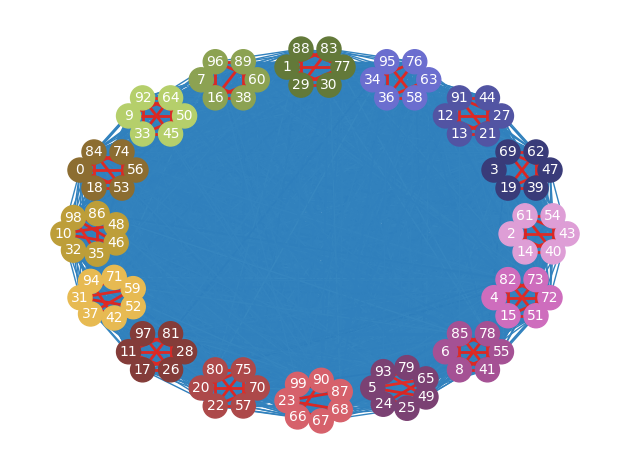

464758.16036641074

In [283]:
G = read_input('/Users/bryceharrell/Desktop/170/170-proj/inputs/small2.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

In [ ]:
run(solve, 'small.in', 'small.out')

In [162]:
run_all(solve, 'input', 'output')
tar('output')

FileNotFoundError: [Errno 2] No such file or directory: 'input'